In [167]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
df = pd.read_csv('/Users/abdullahmujawar/Documents/Stout Case Study/loans_full_schema.csv', sep=',')

In [169]:
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [170]:
def investigate(data)->None:
    print(data.shape)
    print(data.info())
    print(data.describe())

In [171]:
investigate(df)

(10000, 55)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float6

In [172]:
def type_list_generator(data, separated=False):
    """
    Prints out 3 list to store which columns are of which type.
    Interest rate can be in the list or not depending on the seperated variable
    """
    numericals = ['loan_amount','interest_rate', 'balance','paid_principal','paid_late_fees', 
        'paid_interest','annual_income','accounts_opened_24m','num_mort_accounts']
    strings = ['issue_month']
    if separated:
        numericals.pop()
    categoricals = [x for x in data.columns if x not in numericals and x not in strings] 
    return numericals, strings, categoricals

In [173]:
numericals, strings, categoricals = type_list_generator(df)

In [188]:
df.drop(['delinq_2y', 'emp_length', 'earliest_credit_line', 'inquiries_last_12m', 'num_collections_last_12m','num_historical_failed_to_pay', 'current_accounts_delinq', 'months_since_last_credit_inquiry', 'num_accounts_30d_past_due','public_record_bankrupt','term','accounts_opened_24m'],axis = 1,inplace = True)

In [189]:
def drop_nan_columns(data, ratio=1.0)->pd.DataFrame:
    """
    The ratio parameter (0.0<=ratio<1.0) lets you drop columns which has 'ratio'% of nans. (i.e if ratio is 0.8 then all columns with 80% or more entries being nan get dropped)
    Returns a new dataframe
    """
    col_list = []
    na_df = data.isna()
    total_size = na_df.shape[0]
    for col in na_df:
        a = na_df[col].value_counts()
        if False not in a.keys():
            col_list.append(col)
        elif True not in a.keys():
            pass
        else:
            if a[True]/total_size >= ratio:
                col_list.append(col)
    print(f"{len(col_list)} columns dropped- {col_list}")
    return data.drop(col_list, axis=1)

In [190]:
df = drop_nan_columns(df, ratio=0.5)

0 columns dropped- []


In [191]:
def investigate_nan_columns(data)->None:
    """
    Prints an analysis of the nans in the dataframe
    """
    col_dict = {}
    na_df = data.isna()
    total_size = na_df.shape[0]
    for col in na_df:
        a = na_df[col].value_counts()
        if False not in a.keys():
            col_dict[col] = 1.0
        elif True not in a.keys():
            pass
        else:
            col_dict[col] =  a[True]/total_size
    print(f"{col_dict}")
    return

In [192]:
investigate_nan_columns(df)

{}


In [193]:
investigate(df)

(10000, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   emp_title                     10000 non-null  object 
 1   state                         10000 non-null  object 
 2   homeownership                 10000 non-null  object 
 3   annual_income                 10000 non-null  float64
 4   verified_income               10000 non-null  object 
 5   debt_to_income                10000 non-null  float64
 6   total_credit_lines            10000 non-null  int64  
 7   open_credit_lines             10000 non-null  int64  
 8   total_credit_limit            10000 non-null  int64  
 9   total_credit_utilized         10000 non-null  int64  
 10  total_collection_amount_ever  10000 non-null  int64  
 11  current_installment_accounts  10000 non-null  int64  
 12  num_satisfactory_accounts     10000 non-null  int

In [198]:
df['emp_title'] = df['emp_title'].fillna("Unemployed")

In [199]:
any(df.isna().any())

False

In [201]:
investigate(df)

(10000, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   emp_title                     10000 non-null  object 
 1   state                         10000 non-null  object 
 2   homeownership                 10000 non-null  object 
 3   annual_income                 10000 non-null  float64
 4   verified_income               10000 non-null  object 
 5   debt_to_income                10000 non-null  float64
 6   total_credit_lines            10000 non-null  int64  
 7   open_credit_lines             10000 non-null  int64  
 8   total_credit_limit            10000 non-null  int64  
 9   total_credit_utilized         10000 non-null  int64  
 10  total_collection_amount_ever  10000 non-null  int64  
 11  current_installment_accounts  10000 non-null  int64  
 12  num_satisfactory_accounts     10000 non-null  int

In [202]:
def handle_types(data, numericals, strings, categoricals):
    for category in categoricals:
        try:
            data[category] = data[category].astype('category')
        except:
            pass
    data['issue_month'] = data['issue_month'].astype('datetime64')
    return

In [203]:
investigate(df)

(10000, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   emp_title                     10000 non-null  object 
 1   state                         10000 non-null  object 
 2   homeownership                 10000 non-null  object 
 3   annual_income                 10000 non-null  float64
 4   verified_income               10000 non-null  object 
 5   debt_to_income                10000 non-null  float64
 6   total_credit_lines            10000 non-null  int64  
 7   open_credit_lines             10000 non-null  int64  
 8   total_credit_limit            10000 non-null  int64  
 9   total_credit_utilized         10000 non-null  int64  
 10  total_collection_amount_ever  10000 non-null  int64  
 11  current_installment_accounts  10000 non-null  int64  
 12  num_satisfactory_accounts     10000 non-null  int

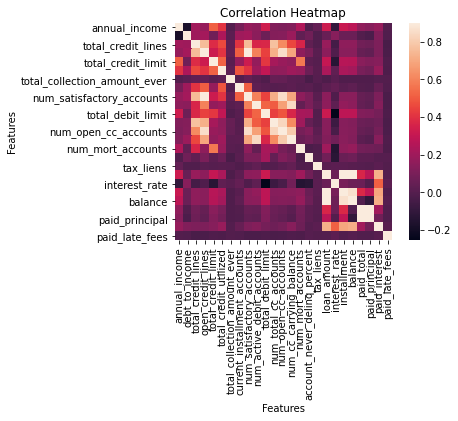

In [204]:
def correlation_heatmap(data):
    corrmat = data.corr()
    sns.heatmap(corrmat, vmax=0.9, square=True)
    plt.title("Correlation Heatmap")
    plt.xlabel("Features")
    plt.ylabel("Features")
    plt.show()
    return

correlation_heatmap(df)

In [160]:
df.corr()

,emp_length,annual_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,...,tax_liens,public_record_bankrupt,loan_amount,term,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
emp_length,1.000000,0.043904,0.041248,0.003907,-0.252359,-0.007038,0.108825,0.043861,0.109527,-0.018291,...,0.016985,0.044303,0.056070,0.040111,0.044518,0.055840,0.007871,0.004822,0.023987,0.007718
annual_income,0.043904,1.000000,-0.175986,0.052236,-0.156001,0.090119,0.210163,0.176788,0.516703,0.406370,...,0.047439,-0.030568,0.324665,0.044843,0.315693,0.280170,0.162005,0.141893,0.174154,-0.005318
debt_to_income,0.041248,-0.175986,1.000000,-0.027411,-0.090660,0.025039,0.199884,0.217677,0.075951,0.238662,...,-0.008281,0.006912,0.055600,0.046419,0.065339,0.065166,-0.003842,-0.019960,0.120510,-0.009886
delinq_2y,0.003907,0.052236,-0.027411,1.000000,-0.078109,0.003152,0.068040,0.013050,0.053373,0.001855,...,-0.005303,-0.044865,-0.033258,-0.025936,-0.013724,-0.031440,-0.004490,-0.006857,0.017165,-0.009404
earliest_credit_line,-0.252359,-0.156001,-0.090660,-0.078109,1.000000,0.042745,-0.294621,-0.174322,-0.231230,-0.140936,...,-0.013752,-0.040181,-0.117749,-0.032736,-0.100001,-0.107508,-0.040281,-0.036125,-0.037027,0.020522
inquiries_last_12m,-0.007038,0.090119,0.025039,0.003152,0.042745,1.000000,0.210433,0.186462,0.128325,0.120593,...,0.007083,0.081222,0.034653,0.030506,0.043704,0.026550,0.032823,0.023155,0.077204,0.022404
total_credit_lines,0.108825,0.210163,0.199884,0.068040,-0.294621,0.210433,1.000000,0.756209,0.385948,0.458980,...,-0.007429,-0.002579,0.179275,0.091341,0.157548,0.158414,0.082315,0.068932,0.112342,-0.030621
open_credit_lines,0.043861,0.176788,0.217677,0.013050,-0.174322,0.186462,0.756209,1.000000,0.326560,0.406047,...,0.015207,0.009116,0.154583,0.068368,0.143714,0.145993,0.049598,0.035624,0.112090,-0.025176
total_credit_limit,0.109527,0.516703,0.075951,0.053373,-0.231230,0.128325,0.385948,0.326560,1.000000,0.520876,...,0.005842,-0.078146,0.303254,0.109235,0.264998,0.262783,0.143306,0.128016,0.135300,-0.014093
total_credit_utilized,-0.018291,0.406370,0.238662,0.001855,-0.140936,0.120593,0.458980,0.406047,0.520876,1.000000,...,0.008273,-0.058941,0.236893,0.085597,0.228762,0.213776,0.101605,0.079426,0.181088,-0.016139


In [218]:
X1_var = df[['loan_amount','balance','paid_principal','paid_late_fees','paid_interest','annual_income','num_mort_accounts','total_credit_lines']]
y_var = df['interest_rate']

In [223]:
import statsmodels.api as sm
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

sm_X1_var = sm.add_constant(X1_var)

mlr_model = sm.OLS(y_var, sm_X1_var)
mlr_reg = mlr_model.fit()

In [216]:
print(mlr_reg.summary())

                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     1327.
Date:                Wed, 03 Nov 2021   Prob (F-statistic):               0.00
Time:                        01:04:01   Log-Likelihood:                -26999.
No. Observations:               10000   AIC:                         5.401e+04
Df Residuals:                    9992   BIC:                         5.407e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.2036      0.07

In [220]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X1_var, y_var, test_size = 0.3, random_state = 0)

lr = LinearRegression()
lr.fit(X_train, y_train)

yhat = lr.predict(X_test)

In [221]:
print('R-Squared :',lr.score(X_test, y_test))

R-Squared : 0.4931530703245306


/Users/abdullahmujawar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/abdullahmujawar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


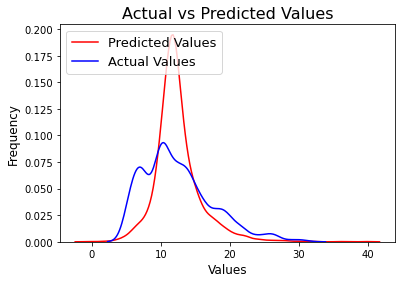

In [224]:
sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

plt.savefig('ap.png')